In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cc_info.csv')

In [3]:
print(data.dtypes)
data.head()

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


For my reference:

A cash advance is a service provided by most credit card and charge card issuers. The service allows cardholders to withdraw cash, either through an ATM or over the counter at a bank or other financial agency, up to a certain limit. For a credit card, this will be the credit limit (or some percentage of it).

In [4]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The columns 'credit_limit' and 'minimum_payments' do not have all 8950 non-NA values.
Visualizing helps to check this.

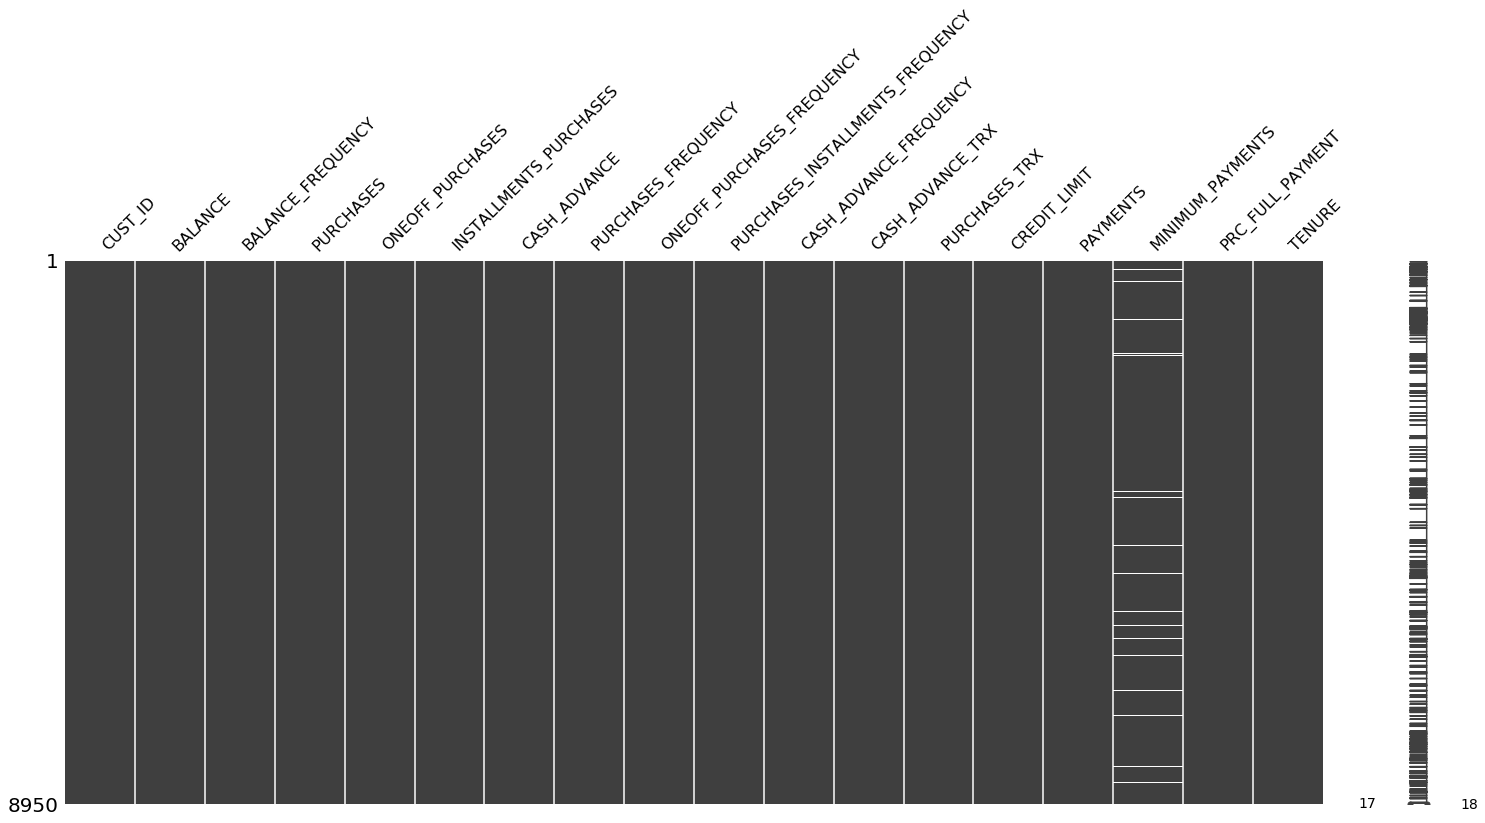

In [5]:
msno.matrix(data)

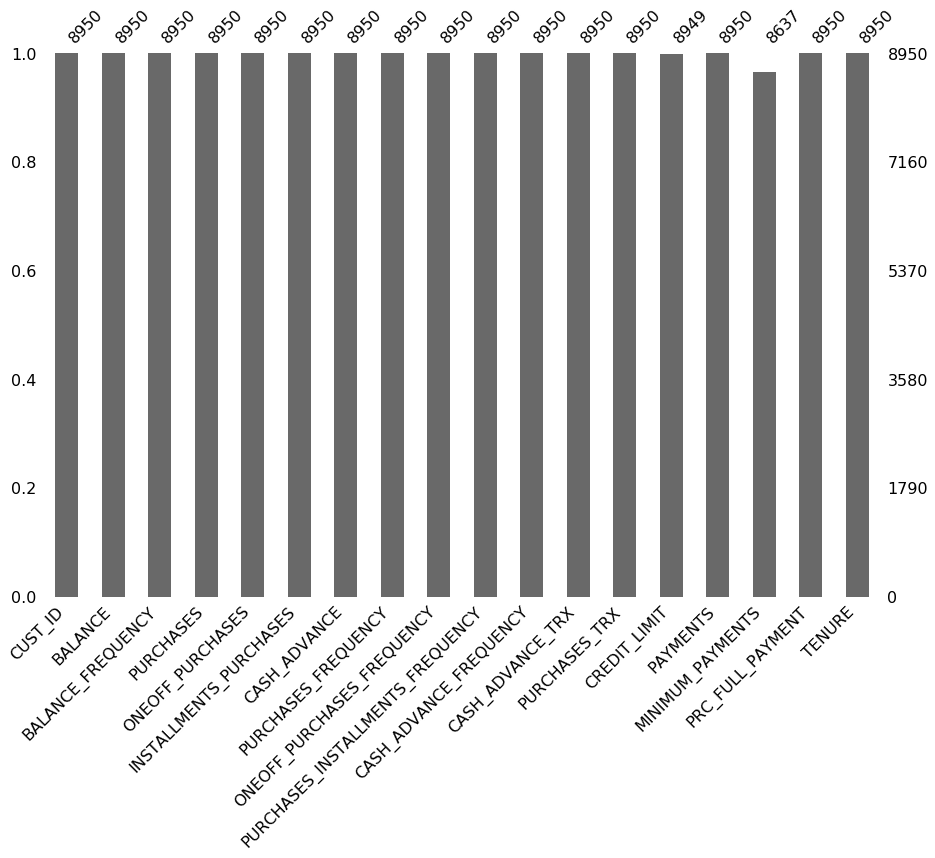

In [6]:
msno.bar(data, figsize=(15,10))

Now we can see that only in the 'minimum_payments' column there's data is missing (3.5% of the data in that column is missing). Options I can use:
- Case Deletion: Drop rows with missing data using df.dropna - this may be appropriate for 'credit_limit', since it has one NA value, I can drop that row. This may also hold for 'minimum_payments' column
- Imputation: Impute missing values - this may be appropriate for the 'minimum_payments' column.
- Do nothing: This is a good option if we don't plan on using that column in our analysis.

In [7]:
#data = data[np.isfinite(data['CREDIT_LIMIT'])]
data = data.dropna(subset = ['CREDIT_LIMIT'])

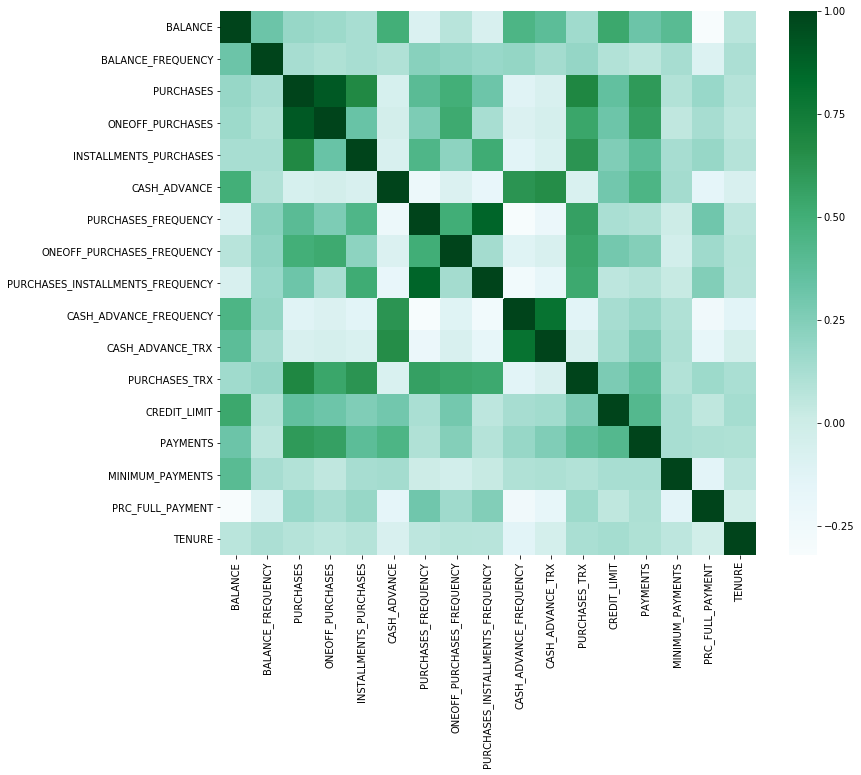

In [8]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), cmap = 'BuGn')

Correlations between the columns/instances of missing data. Here a score of -1 means that when one point is missing the other is not missing, while a score of 1 means that when one point is missing the other is also missing.

This shows that 'minimum_payments' column is not strong correlated to other features. There is a strong correlation between purchases, one-off purchases and purchases installments. (which makes sense, since they are all related to purchasing in one way or the other) 

The relation between minimum payments and balance (0.4 from the figure below) makes sense, because typically, the minimum payment is a small calculated amount of your balance or a fixed dollar value — whichever’s greater.

The minimum is usually based on a percentage of your balance — a small percentage (typically ~2%) if one owes more than \\$1000. Otherwise it is a fixed amount (~$25).

(Source: <a href = https://www.nerdwallet.com/blog/credit-cards/credit-card-issuer-minimum-payment/ > nerdwallet)

In [9]:
#fancy way to do the above, just found this

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

data.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1,0.32,0.18,0.16,0.13,0.5,-0.078,0.073,-0.063,0.45,0.39,0.15,0.53,0.32,0.4,-0.32,0.072
BALANCE_FREQUENCY,0.32,1,0.13,0.1,0.12,0.099,0.23,0.2,0.18,0.19,0.14,0.19,0.096,0.065,0.13,-0.095,0.12
PURCHASES,0.18,0.13,1,0.92,0.68,-0.051,0.39,0.5,0.32,-0.12,-0.067,0.69,0.36,0.6,0.094,0.18,0.086
ONEOFF_PURCHASES,0.16,0.1,0.92,1,0.33,-0.031,0.26,0.52,0.13,-0.083,-0.046,0.55,0.32,0.57,0.049,0.13,0.064
INSTALLMENTS_PURCHASES,0.13,0.12,0.68,0.33,1,-0.064,0.44,0.21,0.51,-0.13,-0.074,0.63,0.26,0.38,0.13,0.18,0.086
CASH_ADVANCE,0.5,0.099,-0.051,-0.031,-0.064,1,-0.22,-0.087,-0.18,0.63,0.66,-0.076,0.3,0.45,0.14,-0.15,-0.069
PURCHASES_FREQUENCY,-0.078,0.23,0.39,0.26,0.44,-0.22,1,0.5,0.86,-0.31,-0.2,0.57,0.12,0.1,0.003,0.31,0.061
ONEOFF_PURCHASES_FREQUENCY,0.073,0.2,0.5,0.52,0.21,-0.087,0.5,1,0.14,-0.11,-0.069,0.54,0.3,0.24,-0.03,0.16,0.082
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1,-0.26,-0.17,0.53,0.061,0.085,0.03,0.25,0.073
CASH_ADVANCE_FREQUENCY,0.45,0.19,-0.12,-0.083,-0.13,0.63,-0.31,-0.11,-0.26,1,0.8,-0.13,0.13,0.18,0.099,-0.25,-0.13


Since the NA values in 'minimum_payments' column are ~3.5%, dropping those might be a good option. Just as a check, I plot the correlation of the dataset after removal of those rows, and the remaining entries still have the same correlation with 'balance'. It also maintains the correlation values with the other columns.

In [18]:
df = data.dropna(subset = ['MINIMUM_PAYMENTS'])

In [19]:
df = df.reset_index(drop = True)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [20]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1,0.31,0.18,0.16,0.12,0.5,-0.088,0.064,-0.07,0.45,0.38,0.15,0.54,0.32,0.4,-0.33,0.067
BALANCE_FREQUENCY,0.31,1,0.12,0.095,0.11,0.089,0.23,0.19,0.18,0.18,0.13,0.18,0.088,0.039,0.13,-0.16,0.1
PURCHASES,0.18,0.12,1,0.92,0.68,-0.054,0.39,0.5,0.32,-0.12,-0.07,0.69,0.36,0.61,0.094,0.18,0.085
ONEOFF_PURCHASES,0.16,0.095,0.92,1,0.33,-0.033,0.27,0.52,0.13,-0.086,-0.049,0.55,0.32,0.57,0.049,0.13,0.063
INSTALLMENTS_PURCHASES,0.12,0.11,0.68,0.33,1,-0.066,0.44,0.21,0.51,-0.14,-0.077,0.63,0.26,0.39,0.13,0.18,0.083
CASH_ADVANCE,0.5,0.089,-0.054,-0.033,-0.066,1,-0.22,-0.09,-0.18,0.63,0.66,-0.078,0.3,0.46,0.14,-0.16,-0.073
PURCHASES_FREQUENCY,-0.088,0.23,0.39,0.27,0.44,-0.22,1,0.5,0.86,-0.32,-0.21,0.57,0.12,0.1,0.003,0.31,0.052
ONEOFF_PURCHASES_FREQUENCY,0.064,0.19,0.5,0.52,0.21,-0.09,0.5,1,0.14,-0.12,-0.073,0.54,0.3,0.24,-0.03,0.15,0.08
PURCHASES_INSTALLMENTS_FREQUENCY,-0.07,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1,-0.27,-0.17,0.53,0.063,0.083,0.03,0.25,0.066
CASH_ADVANCE_FREQUENCY,0.45,0.18,-0.12,-0.086,-0.14,0.63,-0.32,-0.12,-0.27,1,0.8,-0.14,0.13,0.18,0.099,-0.26,-0.14


(array([8.531e+03, 6.500e+01, 2.100e+01, 1.100e+01, 1.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.91630000e-02, 7.64063800e+03, 1.52812568e+04, 2.29218757e+04,
        3.05624945e+04, 3.82031133e+04, 4.58437322e+04, 5.34843510e+04,
        6.11249698e+04, 6.87655887e+04, 7.64062075e+04]),
 <a list of 10 Patch objects>)

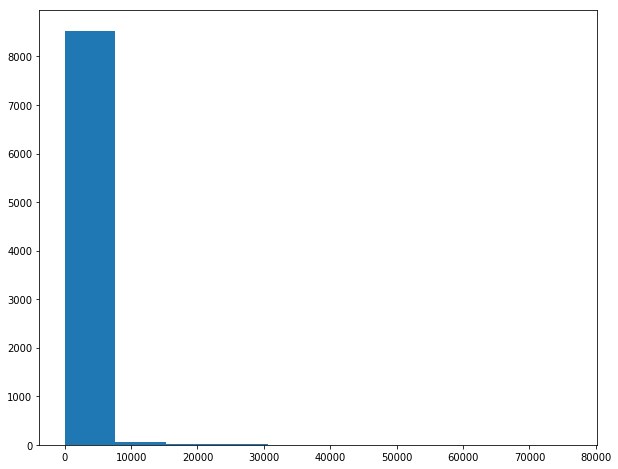

In [21]:
plt.figure(figsize=(10,8))
plt.hist(df['MINIMUM_PAYMENTS'])

In [37]:
len(df[df.MINIMUM_PAYMENTS < 1000.0])/len(df)

0.7941176470588235

There are ~80% users whose minimum payments < \\$1,000. That is there are two kinds of users in this dataset, more number in the lower end.
Two possibilities:
1. Ignore these: But this may eliminate the users who fall into the higher end of the spectrum. (More EDA required)
2. Divide the dataset into two - one set for high end users and one for the rest.

(array([ 792., 2378., 1064.,  595.,  542.,  410.,  355.,  294.,  203.,
         225.]),
 array([1.91630000e-02, 9.99898017e+01, 1.99960440e+02, 2.99931079e+02,
        3.99901718e+02, 4.99872356e+02, 5.99842995e+02, 6.99813634e+02,
        7.99784273e+02, 8.99754911e+02, 9.99725550e+02]),
 <a list of 10 Patch objects>)

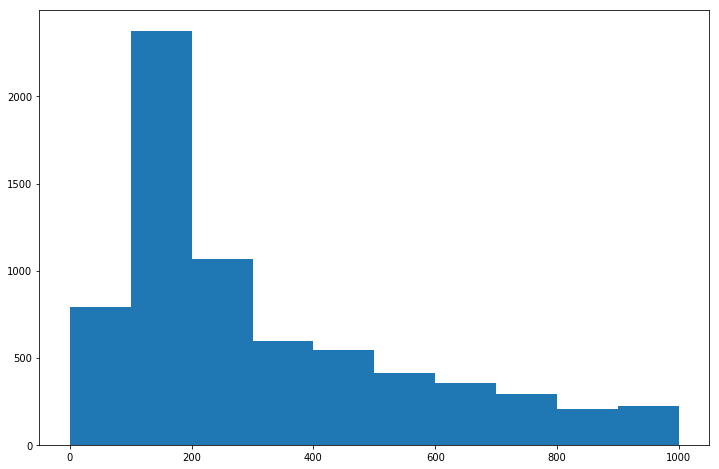

In [44]:
df_low = df.loc[df.MINIMUM_PAYMENTS < 1000.0]

df_high = df.loc[df.MINIMUM_PAYMENTS > 1000.0]

plt.figure(figsize=(12,8))
plt.hist(df_low.MINIMUM_PAYMENTS)

(array([1.686e+03, 5.500e+01, 1.800e+01, 1.100e+01, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1000.206323 ,  8540.8064427, 16081.4065624, 23622.0066821,
        31162.6068018, 38703.2069215, 46243.8070412, 53784.4071609,
        61325.0072806, 68865.6074003, 76406.20752  ]),
 <a list of 10 Patch objects>)

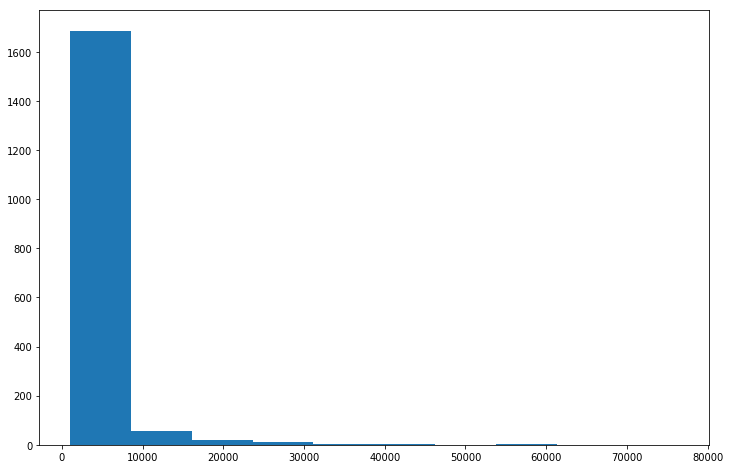

In [45]:
plt.figure(figsize=(12,8))
plt.hist(df_high.MINIMUM_PAYMENTS)

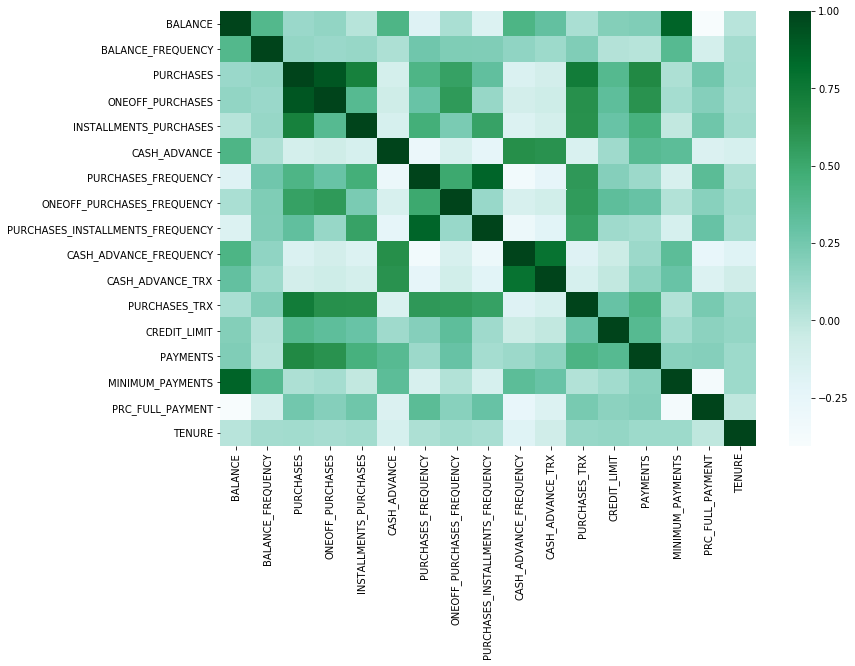

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df_low.corr(), cmap = 'BuGn')

In [50]:
low_corr = df_low.corr()

In [52]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

low_corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1,0.39,0.12,0.14,0.02,0.41,-0.18,0.063,-0.17,0.41,0.31,0.062,0.2,0.21,0.86,-0.41,0.013
BALANCE_FREQUENCY,0.39,1,0.14,0.12,0.13,0.052,0.26,0.21,0.2,0.15,0.11,0.2,0.03,0.019,0.37,-0.11,0.084
PURCHASES,0.12,0.14,1,0.92,0.7,-0.11,0.41,0.53,0.32,-0.15,-0.1,0.74,0.38,0.65,0.054,0.25,0.093
ONEOFF_PURCHASES,0.14,0.12,0.92,1,0.37,-0.071,0.29,0.57,0.13,-0.1,-0.069,0.62,0.33,0.61,0.079,0.19,0.072
INSTALLMENTS_PURCHASES,0.02,0.13,0.7,0.37,1,-0.12,0.46,0.23,0.53,-0.17,-0.11,0.62,0.29,0.44,-0.017,0.27,0.09
CASH_ADVANCE,0.41,0.052,-0.11,-0.071,-0.12,1,-0.29,-0.13,-0.24,0.63,0.61,-0.15,0.1,0.36,0.35,-0.15,-0.12
PURCHASES_FREQUENCY,-0.18,0.26,0.41,0.29,0.46,-0.29,1,0.5,0.86,-0.35,-0.24,0.58,0.19,0.11,-0.13,0.35,0.056
ONEOFF_PURCHASES_FREQUENCY,0.063,0.21,0.53,0.57,0.23,-0.13,0.5,1,0.12,-0.13,-0.091,0.57,0.34,0.29,0.035,0.18,0.089
PURCHASES_INSTALLMENTS_FREQUENCY,-0.17,0.2,0.32,0.13,0.53,-0.24,0.86,0.12,1,-0.29,-0.2,0.53,0.1,0.08,-0.12,0.29,0.067
CASH_ADVANCE_FREQUENCY,0.41,0.15,-0.15,-0.1,-0.17,0.63,-0.35,-0.13,-0.29,1,0.79,-0.18,-0.053,0.11,0.34,-0.25,-0.19


In [68]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns[df.columns != 'CUST_ID']
    for i in range(0, df.shape[1] - 1):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [71]:
get_top_abs_correlations(df_low, 10)

PURCHASES               ONEOFF_PURCHASES                    0.921806
BALANCE                 MINIMUM_PAYMENTS                    0.858306
PURCHASES_FREQUENCY     PURCHASES_INSTALLMENTS_FREQUENCY    0.856061
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX                    0.790221
PURCHASES               PURCHASES_TRX                       0.735600
                        INSTALLMENTS_PURCHASES              0.704254
                        PAYMENTS                            0.654594
CASH_ADVANCE            CASH_ADVANCE_FREQUENCY              0.632101
ONEOFF_PURCHASES        PURCHASES_TRX                       0.623667
INSTALLMENTS_PURCHASES  PURCHASES_TRX                       0.617788
dtype: float64

In [72]:
get_top_abs_correlations(df_high, 10)

PURCHASES               ONEOFF_PURCHASES                    0.910513
PURCHASES_FREQUENCY     PURCHASES_INSTALLMENTS_FREQUENCY    0.885550
BALANCE                 CREDIT_LIMIT                        0.797787
CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX                    0.784140
CASH_ADVANCE            CASH_ADVANCE_TRX                    0.645750
PURCHASES               INSTALLMENTS_PURCHASES              0.639920
INSTALLMENTS_PURCHASES  PURCHASES_TRX                       0.632062
PURCHASES               PURCHASES_TRX                       0.615113
CASH_ADVANCE            CASH_ADVANCE_FREQUENCY              0.590793
PURCHASES_FREQUENCY     PURCHASES_TRX                       0.575833
dtype: float64

In [55]:
columns = np.full((low_corr.shape[0],), True, dtype=bool)
for i in range(low_corr.shape[0]):
    for j in range(i+1, low_corr.shape[0]):
        if low_corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_low.columns[columns]
new_low = df_low[selected_columns]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 17